In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Read Data
test = data.DataReader(['PLANB.BK', 'KKP.BK'], 'yahoo', start='2022/01/01', end='2022/06/22')
test.head()

Attributes Adj Close               Close            High             Low  \
Symbols     PLANB.BK     KKP.BK PLANB.BK KKP.BK PLANB.BK KKP.BK PLANB.BK   
Date                                                                       
2022-01-04      8.05  59.683891     8.05  61.50     8.30  61.75     7.65   
2022-01-05      7.90  59.683891     7.90  61.50     8.25  61.75     7.80   
2022-01-06      7.60  60.654362     7.60  62.50     7.90  63.00     7.45   
2022-01-07      7.60  61.139595     7.60  63.00     7.65  63.50     7.40   
2022-01-10      7.55  63.323154     7.55  65.25     7.70  65.75     7.40   

Attributes            Open             Volume              
Symbols    KKP.BK PLANB.BK KKP.BK    PLANB.BK      KKP.BK  
Date                                                       
2022-01-04  60.25     7.70  60.25  38313500.0   4439200.0  
2022-01-05  60.75     7.80  61.50  38429300.0   2908800.0  
2022-01-06  60.75     7.90  61.50  32351600.0   8000300.0  
2022-01-07  62.25     7.65  62.50  10071300.0   5542400.0  
2022-01-10  63.25     7.60  63.25  12728900.0  12652600.0

In [29]:
# Closing price
test = test['Adj Close']
test.tail()

Symbols,PLANB.BK,KKP.BK
Date,,
2022-06-16,7.25,65.00
2022-06-17,7.10,63.75
2022-06-20,7.15,63.25
2022-06-21,6.90,64.00
2022-06-22,6.85,63.00


In [30]:
# Log of percentage change
planb = test['PLANB.BK'].pct_change().apply(lambda x: np.log(1+x))
planb.round(4).head()

Date
2022-01-04       NaN
2022-01-05   -0.0188
2022-01-06   -0.0387
2022-01-07    0.0000
2022-01-10   -0.0066
Name: PLANB.BK, dtype: float64

In [31]:
# Log of percentage change
kkp = test['KKP.BK'].pct_change().apply(lambda x: np.log(1+x))
kkp.round(4).head()

Date
2022-01-04       NaN
2022-01-05    0.0000
2022-01-06    0.0161
2022-01-07    0.0080
2022-01-10    0.0351
Name: KKP.BK, dtype: float64

In [33]:
# Variance
var_planb = planb.var()
var_planb.round(4)

0.0004

In [34]:
# Variance
var_kkp = kkp.var()
var_kkp.round(4)

0.0002

In [37]:
# Volatility
planb_vol = np.sqrt(var_planb * 250)
kkp_vol = np.sqrt(var_kkp * 250)
planb_vol.round(2), kkp_vol.round(2)

(0.32, 0.23)

<AxesSubplot:xlabel='Symbols'>

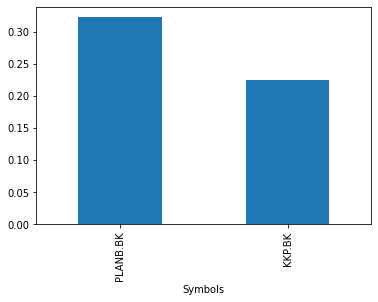

In [38]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [39]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,PLANB.BK,KKP.BK
Date,,
2022-01-04,NaN,NaN
2022-01-05,-0.018809,0.000000
2022-01-06,-0.038715,0.016129
2022-01-07,0.000000,0.007968
2022-01-10,-0.006601,0.035091


In [46]:
# Covariance
test1['PLANB.BK'].cov(test1['KKP.BK']).round(6)

4.3e-05

In [49]:
test1['PLANB.BK'].corr(test1['KKP.BK']).round(2)

0.15

In [56]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,PLANB.BK,KKP.BK
Date,,
2022-01-04,NaN,NaN
2022-01-05,-0.018809,0.000000
2022-01-06,-0.038715,0.016129
2022-01-07,0.000000,0.007968
2022-01-10,-0.006601,0.035091


In [65]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind.round(4)

Symbols
PLANB.BK   -0.0014
KKP.BK      0.0005
dtype: float64

In [66]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r.round(4)

0.0001